# Neural Networks Implementation
 
This notebook will show you how you can implement your own neural network. It will be drawing on the corresponding lecture.

This notebook will guide you through the process of implementation.

![NN_01.png](attachment:NN_01.png)
 
The object-oriented parts of this code have been taken from 
https://gist.github.com/ZSalloum/54703842f8a06e38fd76934579a6c814 and has been slightly adjusted for this class. To read more about it, you can read his blog posts on:

https://towardsdatascience.com/back-propagation-the-easy-way-part-1-6a8cde653f65

https://towardsdatascience.com/back-propagation-the-easy-way-part-2-bea37046c897

https://towardsdatascience.com/back-propagation-the-easy-way-part-3-cc1de33e8397

In [1]:
import sklearn
import matplotlib.pyplot as plt
from pandas import DataFrame
import pandas as pd
import numpy as np

## Input Layer - Create Data for Classification
Notation: \begin{equation}X = 
\begin{pmatrix}
x_{1} \\
x_{2}\\
\vdots\\
x_{m} 
\end{pmatrix}\end{equation}
with $m$ being the number of samples. 

![NN_02.png](attachment:NN_02.png)

Our input layer is our data. To test our model later, we will create some data to use for the classification task.

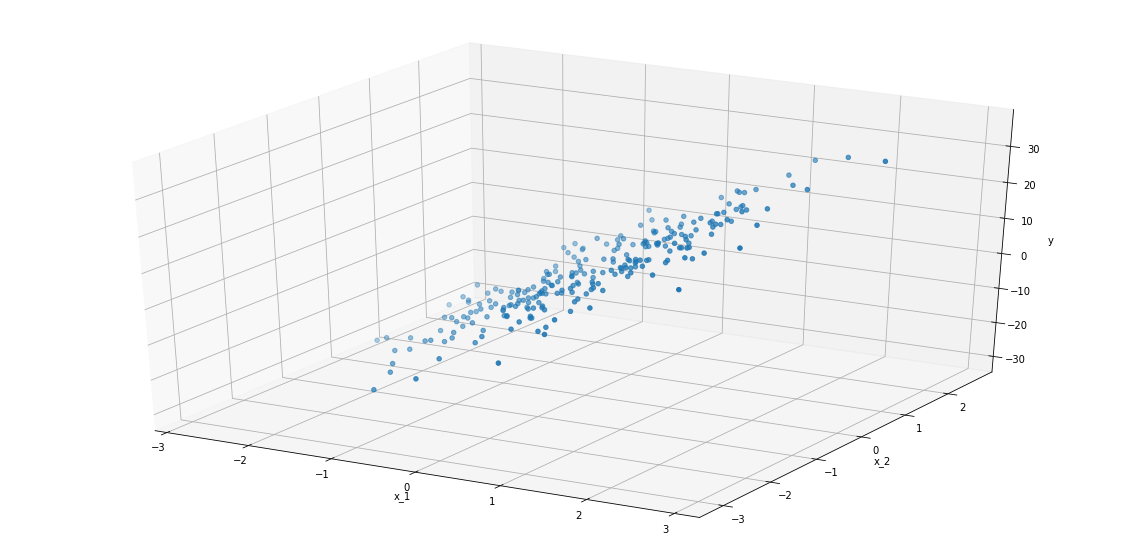

In [2]:
from sklearn.datasets import make_regression
from mpl_toolkits import mplot3d
# generate 2d classification dataset with n = 250
n = 250
X, y = make_regression(n_samples=n, n_features = 2, noise=1, random_state = 99)


# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x_1=X[:,0], x_2=X[:,1], y=y))
plot = plt.figure(figsize=(20,10)).gca(projection='3d')
plot.scatter(df['x_1'], df['x_2'], df['y'])
plot.set_xlabel('x_1')
plot.set_ylabel('x_2')
plot.set_zlabel('y')

plt.show()
y = y.reshape(n,1)


## Forward Pass

### Weights

![NN_03.png](attachment:NN_03.png)

Notation: $ W $ if we are talking about the weight matrices.
When refering to single weights, the following notation is relevant:

\begin{equation} \Large w^{(l)}_{kj} \end{equation}

The weight matrice has the following dimensions of $W$
\begin{equation} [k^{l-1}, k^{l}] \Large \end{equation} with $k_{l-1}$ being the amount of knots in the previous layer and $k_{l}$ being the weights of the current layer.

So for the first hidden layer:

\begin{equation} \Large W^{(1)} = \end{equation}
\begin{pmatrix}
w_{11} & w_{12} & w_{13}\\
w_{21} & w_{22} & w_{23}
\end{pmatrix} with dimensions
\begin{equation} [2, 3] \Large \end{equation}
Note: for the first layer,  \begin{equation} k^{l-1} = m \end{equation}

Question to check your understanding: 
For our example, which dimensions would the other weight matrices have? \begin{equation} \Large W^{(2)}, \Large W^{(L)} \end{equation}


In [3]:
np.random.seed(10)
# Code for initialsing weights, before object oriented programming: 
dim = (2,3)
w = 2 * np.random.random(dim) 
print("W = ", w)


W =  [[1.54264129 0.0415039  1.26729647]
 [1.49760777 0.99701402 0.44959329]]


*Please note: This is where we would usually also initialise the weights for the bias. However, to simplify the task and focus on the understanding of the task, we are leaving out the bias at this point.*

### Hidden Layers
![NN_04.png](attachment:NN_04.png)

### Hidden Layer Step 1: Calculate Z

To be able to calculate z, the left part of the hidden layer in the image above, we need the weights, the bias and the input layer (or the output of the previous layer). 


In [4]:
# How to implement this calculation with matrices in python
z = np.dot(X, w)

*Please note: If working with the bias, we would simply add it here.

### Hidden Layer Step 2: Calculate h / Activation Functions
- Notation: 
\begin{equation} \Large H^{(l)} = g(Z^{(l)}) \end{equation}


\begin{gather}
 \begin{pmatrix}
           h^{(1)}_{1}\\
           h^{(1)}_{2}\\
           h^{(1)}_{3}
         \end{pmatrix}
 = 
 \begin{pmatrix}
           g(z^{(1)}_{1})\\
           g(z^{(1)}_{2})\\
           g(z^{(1)}_{3})
         \end{pmatrix}
\end{gather}
During the forward pass, we only need the activation function, but for simplicity and because we need this knowledge for the backpropagation part, we will also discuss the derivatives of the activation functions. Also, during the forward pass, we will always store the result of the derivative as well to work more efficient and use less computational power. 

###### Function for plotting of activation function 
*This can be skipped and has been added for functionality*

In [5]:
def plot_activation_functions(type="sigmoid"):
  import numpy as np
  from matplotlib import pyplot as plt
  n = 100
    # todo maybe change z notation to not overwrite or manual function, i.e. z_example or sth
    # explain no.linespace 
  z=np.linspace(start=-5, stop=5, num=n)

  if type == "sigmoid":
    def sigmoid(z):
      return 1.0 / (1.0 + np.exp(-z))

    def sigmoid_prime(z):
      return sigmoid(z) * (1.0 - sigmoid(z))

    plt.plot(z, sigmoid(z), 'b-', label="g(z)")
    plt.plot(z, sigmoid_prime(z), 'r-', label="g'(z)")
    plt.legend(loc='best')
    plt.grid(True)
    plt.xlabel('z')
    plt.ylabel('g(z)')
    plt.show()
  
  if type == "tanh":
    def tanh(z):
      return np.tanh(z)
    def tanh_prime(z):
      return 1.0 - np.tanh(z) ** 2

    plt.plot(z, tanh(z), 'b-', label="g(z)")
    plt.plot(z, tanh_prime(z), 'r-', label="g'(z)")
    plt.legend(loc='best')
    plt.grid(True)
    plt.xlabel('z')
    plt.ylabel('g(z)')
    plt.show()

  if type == "relu":
    def relu(z):
      return np.maximum(z,0)
    def relu_prime(z):
      z[z <= 0] = 0
      z[z > 0] = 1
      return z
      
    some_var=np.linspace(start=-5, stop=5, num=n)
    g=np.maximum(0, some_var)
    d=(g>1).astype(int)
    plt.plot(z, np.maximum(0, z), 'b-', label="g(z)")
    plt.plot(z, (g>1).astype(int), 'r-', label="g'(z)")
    plt.legend(loc='best')
    plt.grid(True)
    plt.xlabel('z')
    plt.ylabel('g(z)')
    plt.show()


#### Sigmoid



\begin{equation} \Large g(z) = σ(z) = \frac{1}{{1+e^{-z}}} \end{equation}

Therefore, the derivative is:

\begin{equation} \Large g'(z) = σ'(z) = σ(x) (1−σ(x)) \end{equation}



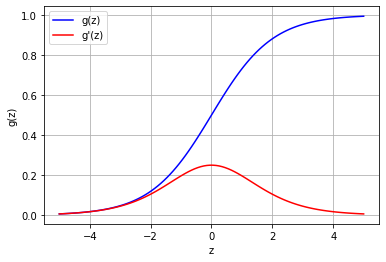

In [6]:
plot_activation_functions(type="sigmoid")

# Defining functions in python
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))


def sigmoid_prime(x):
    return sigmoid(x) * (1.0 - sigmoid(x))



#### Hyperbolic Tangent (tanh)


\begin{equation} \Large g(z) = tanh(z) = \frac{e^z-e^{-z}}{e^z+e^{-z}} \end{equation}

Therefore, the derivative is:
\begin{equation} \Large g'(z) = tanh'(z) = 1-tanh(z)^2 \end{equation}


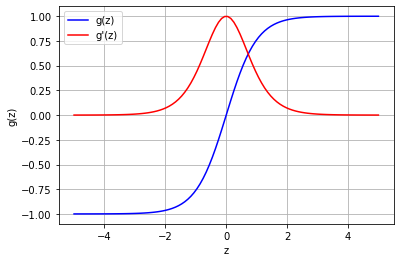

In [7]:
plot_activation_functions(type="tanh");



def tanh(x):
    return np.tanh(x)


def tanh_prime(x):
    return 1.0 - np.tanh(x) ** 2



####  Rectified Linear Unit (ReLU)


\begin{equation} \Large g(z) = ReLU(z) = max(0,z) \end{equation}

Therefore, the derivative is:

\begin{equation} \Large
g'(z)=  ReLU'(z) =
\begin{cases}
    0 & \text{if } z < 0 \\ 1 & \text{if } z > 0
\end{cases}
\end{equation}

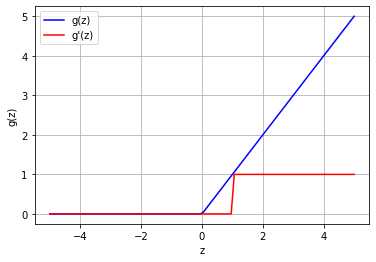

In [8]:
plot_activation_functions(type="relu")

def relu(x):
    return np.maximum(x,0)


def relu_prime(x):
    x[x <= 0] = 0
    x[x > 0] = 1
    return x

## Output Layer

In this step, we continue just like before, however, we do not incorporate the activation function, meaning our result is $z$ for the output layer.
![NN_05.png](attachment:NN_05.png)

## Forward Pass Implementation

Now that the theory has been discussed, let's have a closer look at how we can implement this in python properly.

In [9]:
# hard-coding
np.random.seed(10)
k = [2,3,2,1] # knots per layer
W = [] # saving the weights so we can analyse them
h = X[0] # our first h equals the input layer, meaning the values for x_1 and x_2. We will be working with one oberservation for better understanding.
Z = [] # save Z for analysis 
H = [] # save H to analyse
Z_prime = []

for i, (previous, current) in enumerate(zip(k, k[1:])):
  #initialise weights
  dim = (previous, current)
  w = 2 * np.random.random(dim) 
  W.append(w)
  z = np.dot(h, w)
  H.append(h)
  Z_prime.append(sigmoid_prime(z))
  if i != len(k)-2: # -1 for subsitution of input layer, -1 for index starting at 0 = -2
    h = sigmoid(z) 
  else:
    h = z # no activation in output layer
  print("         dimensions,    matrice")
  print("Layer", i+1)
  print("Weight:", w.shape, w)
  print("Z:", z.shape, z)
  print("H:", h.shape, h)

         dimensions,    matrice
Layer 1
Weight: (2, 3) [[1.54264129 0.0415039  1.26729647]
 [1.49760777 0.99701402 0.44959329]]
Z: (3,) [1.73063385 1.67326076 0.09430934]
H: (3,) [0.84949348 0.84201008 0.52355988]
         dimensions,    matrice
Layer 2
Weight: (3, 2) [[0.39612573 1.52106142]
 [0.33822167 0.17667963]
 [1.37071964 1.90678669]]
Z: (2,) [1.33894609 2.43921479]
H: (2,) [0.79231657 0.91976916]
         dimensions,    matrice
Layer 3
Weight: (2, 1) [[0.00789653]
 [1.02438453]]
Z: (1,) [0.94845385]
H: (1,) [0.94845385]


In [10]:
# object-oriented 
np.random.seed(99)
class Layer:

    def __init__(self, dim, id, act, act_prime, isoutputLayer = False): 
        # dim = dimensions of the weight matrix [d_l, d_(l-1)]
        # id: integer of id of the layer
        # act and act prime: the activation function and its derivative
        # isoutputLayer: true if its the output layer
        self.weight = 2 * np.random.random(dim) - 1 # the weight for each node
        self.delta = None # create empty variable to store delta 
        self.H = None # create emtpy varaible for activation (h)
        self.activation = act # define activation
        self.activation_prime = act_prime # define action of derivative of activation function calculation # todo rephrase 
        self.isoutputLayer = isoutputLayer # different action in the output layer 
        self.id = id # node identification

    def forward(self, x):
        z = np.dot(x, self.weight) # matrix calculation of input into layer (either X or H)
        self.H = self.activation(z) # create h from z by using activation function 
        self.dZ = self.activation_prime(z); # store the prime of the activation function for backpropagation alter to safe computational power

        return self.H

### Loss Function
![NN_06.png](attachment:NN_06.png)
We set our weights at random initially and want to improve our weights given the output. Therefore, we need to define a loss function.

\begin{equation} \Large J = \dfrac{1}{2}(y-\hat{y})^2\end{equation}

With this loss function we can calculate the deviation from the predicted target $\hat{y}$ to the actual target $y$. By defining a loss function we can calculate the gradient descent by calculating $ \dfrac{\partial J(W_{t})}{\partial W_t}$.

![NN_09.png](attachment:NN_09.png)

## Calculating Partial Derivative and Deltas


As discussed, we can do this by conducting the following calculation: 
\begin{equation} \Large \dfrac{\partial J(W_{t})}{\partial W_t}= \delta^{(l)} h^{(l-1)}\end{equation} with $h^{(l-1)}$ being the output of the layer to the left and $\delta$ having to be calculated differently based on whether or not it is the output layer. The current delta always depends on the delta to the right, which is why we talk about backpropagation: starting from the back to the beginning. 

For the output layer, we have to calculate the following:

\begin{equation} \Large \delta^{(L)} = \hat{y}-y \end{equation}

For all other layers it equated to:
\begin{equation} \Large \delta^{(l)} = ((w^{(l+1)})^T \delta^{(l+1)})g'(z^{(l)}) \end{equation}
![NN_07.png](attachment:NN_07.png)


In [11]:
# hard-coding
Delta = []

n = 3 # amount of layers incl. output layer exl. input layer
for layer in reversed(range(1,n)):
  print("Layer:", layer)
  if layer == 2:
    error = h - y[0]
    delta = error
  else:
    delta = delta * Z_prime[layer+1] * W[layer+1][0]
  print(delta)
  Delta.append(delta)

Delta.append(0) # necessary because for the layer 0 (input) there is no delta, so we need to fil this gap to be able to properly reference the correct numbers
Delta.reverse()

Layer: 2
[0.83968955]
Layer: 1
[0.00133439]


*Please note that we will be mulitplying delta with h^(l-1) directly in the update part.*
![NN_08.png](attachment:NN_08.png)

In [12]:
# object-oriented 
class Layer:    
    def backward(self, y, rightLayer):
        if self.isoutputLayer:
            error =  self.H - y 
            self.delta = error
        else:
            self.delta = np.atleast_2d(
                rightLayer.delta.dot(rightLayer.weight.T) # delta of right layer, weight of right layer, and derivative of activation function of this layer
                * self.dZ)
        return self.delta

### Update Weights
So, lastly, we need to update our weights. 


\begin{equation} \Large W_{t+1} ← W_t -η \dfrac{\partial J(W_{t})}{\partial W_t} \end{equation}
with $W_t$ being our current weight, $W_{t+1}$ being the new weight and $η$ being the learning rate (hyperparameter).

In [13]:
# hard-coding
learning_rate = 0.1 # set learning rate
W_new = [] # save new weights
for layer in reversed(range(1,n)):
  w_t1 = float(W[layer][0][0]- learning_rate*H[layer-1][0] * Delta[layer])
  W_new.append(w_t1)

print(W_new)

[-0.06343454683279225, 0.3961962898170945]


In [14]:
# object-oriented
class Layer:
    def update(self, learning_rate, left_h):
        a = np.atleast_2d(left_h)
        d = np.atleast_2d(self.delta)
        hd = a.T.dot(d)
        self.weight -= learning_rate * hd  

# Implementation Summary

Now that we understand the background, lets put all this together to be able to build a model.

In [15]:
# object-oriented
class Layer:

    def __init__(self, dim, id, act, act_prime, isoutputLayer = False):
        self.weight = 2 * np.random.random(dim) - 1
        self.delta = None
        self.H = None
        self.activation = act
        self.activation_prime = act_prime
        self.isoutputLayer = isoutputLayer
        self.id = id


    def forward(self, x):
        z = np.dot(x, self.weight)
        self.dZ = np.atleast_2d(self.activation_prime(z));
        if self.isoutputLayer:
          self.H = z
        else:
          self.H = self.activation(z)
        return self.H

    def backward(self, y, rightLayer):
        if self.isoutputLayer:
            error = self.H - y
            self.delta = error
            te = (pow(error, 2))
            total_error.append(np.average(0.5*te))
            
        else:
            self.delta = np.atleast_2d(
                np.dot(rightLayer.delta, rightLayer.weight.T)
                * self.dZ)
            
        return self.delta

    def update(self, learning_rate, left_h):
        h = np.atleast_2d(left_h)
        d = np.atleast_2d(self.delta)
        hd = h.T.dot(d)
        self.weight -= learning_rate * hd
    


class NeuralNetwork:

    def __init__(self, layersDim, activation='tanh'):
        if activation == 'sigmoid':
            self.activation = sigmoid
            self.activation_prime = sigmoid_prime
        elif activation == 'tanh':
            self.activation = tanh
            self.activation_prime = tanh_prime
        elif activation == 'relu':
            self.activation = relu
            self.activation_prime = relu_prime

        self.layers = []
        for i in range(1, len(layersDim) - 1):
            dim = (layersDim[i - 1] + 1, layersDim[i] + 1)
            self.layers.append(Layer(dim, i, self.activation, self.activation_prime))

        dim = (layersDim[i] + 1, layersDim[i + 1])
        self.layers.append(Layer(dim, len(layersDim) - 1, self.activation, self.activation_prime, True))

    def fit(self, X, y, learning_rate=0.1, epochs=10000):
        np.random.seed(999)
        # Add column of ones to X
        # This is to add the bias unit to the input layer
        ones = np.atleast_2d(np.ones(X.shape[0]))
        X = np.concatenate((ones.T, X), axis=1)


        for k in range(epochs):


            h=X

            for l in range(len(self.layers)):
                h = self.layers[l].forward(h)


            delta = self.layers[-1].backward(y, None)

            for l in range(len(self.layers) - 2, -1, -1):
                delta = self.layers[l].backward(delta, self.layers[l+1])



            h = X
            for layer in self.layers:
                layer.update(learning_rate, h)
                h = layer.H

    def predict(self, x):
        h = np.concatenate((np.ones(1).T, np.array(x)), axis=0)
        for l in range(0, len(self.layers)):
            h = self.layers[l].forward(a)
        return h

# Training models

In [16]:
gd_plot = pd.DataFrame(columns=["sigmoid", "tanh"]) # create df for saving loss over epochs
epochs= 2000 # define amount of epochs

In [17]:
# train with sigmoid function
total_error = []
nn = NeuralNetwork([2, 3, 2, 1], activation='sigmoid')
nn.fit(X, y, learning_rate=0.0001, epochs=epochs)

gd_plot['sigmoid'] = total_error

In [18]:
# train with tanh function
total_error = []
nn = NeuralNetwork([2, 3, 2, 1], activation='tanh')
nn.fit(X, y, learning_rate=0.00001, epochs=epochs)

gd_plot['tanh'] = total_error

# Model Evaluation

To see if our model is working, we can see how the error developed based on our loss function.


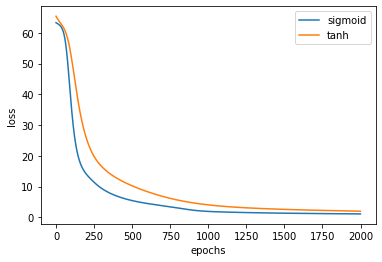

In [19]:
# plot results
plt.plot(gd_plot.index, gd_plot['sigmoid'], label = "sigmoid")
plt.plot(gd_plot.index, gd_plot['tanh'], label = "tanh")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()